In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the Dataset and show top 5 rows
df = pd.read_csv("D:\Data Science\Excel files\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Find the shape of our dataset
df.shape

(10000, 14)

In [4]:
print("Number of Rows -",df.shape[0])
print("Number of Columns -",df.shape[1])

Number of Rows - 10000
Number of Columns - 14


In [5]:
# To get information of Dataset Like Total Number of Rows, Total Number of Columns, Dtatypes of Each Column And Memory Requirement.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check the Null Values In The Dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Get Overall Statistics About The Dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
# Dropping Irrelevant Features
df = df.drop(["RowNumber","CustomerId","Surname"],axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 11)

In [11]:
# Encoding Categorical Data
df["Geography"].unique(),df["Gender"].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [12]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
df.shape

(10000, 12)

In [14]:
# Not Handling Imbalanced
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

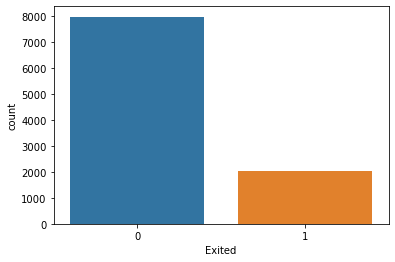

In [15]:
sns.countplot(df["Exited"])

In [16]:
X = df.drop("Exited",axis=1)
y = df["Exited"]

In [17]:
# Handling Imbalanced Data With SMOTE

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [20]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [21]:
# Splitting the Dataset into the Training Set And Test set
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [24]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
lr.score(X_test,y_test)

0.7837413684871312

In [28]:
lr.score(X_test,y_test)

0.7837413684871312

In [29]:
y_pred1 = lr.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.7837413684871312

In [32]:
accuracy_score(y_test,y_pred1)

0.7837413684871312

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



# SVC

In [35]:
from sklearn import svm
from sklearn.metrics import precision_score,accuracy_score,recall_score

In [36]:
svm = svm.SVC()

In [37]:
svm.fit(X_train,y_train)

SVC()

In [38]:
y_pred2 = svm.predict(X_test)

In [39]:
svm.score(X_test,y_test)

0.8396107972379159

In [40]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1633
           1       0.83      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# KNeighbors Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred3= knn.predict(X_test)

In [45]:
knn.score(X_test,y_test)

0.8192090395480226

In [46]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.80      0.83      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186



# Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt = DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
dt.score(X_test,y_test)

0.7780916509730069

In [51]:
y_pred4 = dt.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1633
           1       0.76      0.80      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf = RandomForestClassifier()

In [55]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
rf.score(X_test,y_test)

0.8559322033898306

In [57]:
y_pred5 = rf.predict(X_test)

In [58]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1633
           1       0.85      0.86      0.85      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [59]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5)]})

In [60]:
final_df

,Models,ACC
0,LR,0.783741
1,SVC,0.839611
2,KNN,0.819209
3,DT,0.778092
4,RF,0.855932


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

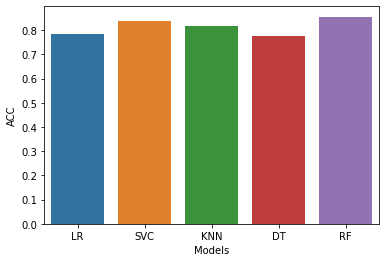

In [61]:
sns.barplot(final_df['Models'],final_df['ACC'])

In [62]:
final_df = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5)]})

In [63]:
final_df

,Models,PRE
0,LR,0.770000
1,SVC,0.833974
2,KNN,0.802477
3,DT,0.756987
4,RF,0.847522


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='PRE'>

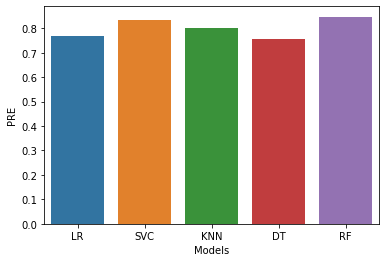

In [64]:
sns.barplot(final_df['Models'],final_df['PRE'])

# Save The Model

In [65]:
X_res = sc.fit_transform(X_res)

In [66]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [67]:
import joblib

In [68]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [69]:
model = joblib.load('churn_predict_model')

In [70]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [71]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

# GUI

In [72]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
model = joblib.load('churn_predict_model')

master = Tk()

def label(master, text, row):
    Label(master, text=text).grid(row=row, sticky=W)

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 ==2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 ==3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
    p10=int(e10.get())
    
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                                        p5,p6,
                                        p7,p8,Geography_Germany,Geography_Spain,p10]]))
    if result == 0:
        print("The customer will not churn")
    else:
        print("The customer will churn")

label(master, "Enter Credit score", 1)
label(master, "Enter Your Age", 2)
label(master, "Enter Tenure", 3)
label(master, "Enter Your Balance", 4)
label(master, "Enter Number of Product", 5)
label(master, "Enter HasCrCard", 6)
label(master, "Enter IsActiveMember", 7)
label(master, "Enter Your Estimate Salary", 8)
label(master, "Enter Geography (1=Germany, 2=Spain, 3=France)", 9)
label(master, "Enter Your Gender (0=Female, 1=Male)", 10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=11, column=1)

mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\dell\AppData\Local\Temp\ipykernel_13820\3963342188.py", line 37, in show_entry_fields
    result=model.predict(sc.transform([[p1,p2,p3,p4,
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py", line 970, in transform
    check_is_fitted(self)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1222, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\dell\AppData\Local\T